# K-means clustering

A01639224 | Fausto Alejandro Palma Cervantes

The notebook aims to study and implement a k-means clustering. The Iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [7]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Ignore warning messages (for subplot printing style)
import warnings
warnings.filterwarnings("ignore")

# Importing data

In [5]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file, store it as a pandas Data Frame and set column names
dataset = pd.read_csv(url, names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'])

# Activity: work with the Iris dataset

1. Do clustering with the Iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.

NameError: name 'KMeans' is not defined

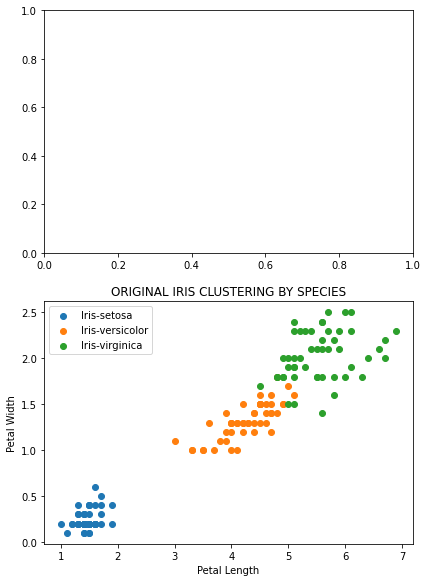

In [6]:
# SUBPLOT FIGURES SIZE (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)
plt.subplots(figsize=((2 * plt.rcParams.get('figure.figsize')[0]), (2 * plt.rcParams.get('figure.figsize')[1])))
plt.tight_layout()

# QUESTION 1 - Form clusters using Petal width and length
ds1 = dataset.copy()

# SCATTER PLOT OF SPECIES CLUSTERS
plt.subplot(2, 2, 3)

# Drop out non necesary columns
ds1.drop(['SepalLength', 'SepalWidth'], axis='columns', inplace=True)

df0 = ds1[ds1.Class=="Iris-setosa"]
df1 = ds1[ds1.Class=="Iris-versicolor"]
df2 = ds1[ds1.Class=="Iris-virginica"]

plt.scatter(df0.PetalLength, df0.PetalWidth, Label='Iris-setosa')
plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Iris-versicolor')
plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Iris-virginica')

plt.title('ORIGINAL IRIS CLUSTERING BY SPECIES')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# SCATTER PLOT OF KMEANS CLUSTERS
plt.subplot(2, 2, 1)

# Define number of clusters
K = 3
km = KMeans(n_clusters=K)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(ds1[['PetalLength','PetalWidth']])

# Add a new column to the dataset with the cluster information
ds1['ClusterInfo'] = yp

df0 = ds1[ds1.ClusterInfo==0]
df1 = ds1[ds1.ClusterInfo==1]
df2 = ds1[ds1.ClusterInfo==2]

plt.scatter(df0.PetalLength, df0.PetalWidth, Label='Iris Species 1')
plt.scatter(df1.PetalLength, df1.PetalWidth, Label='Iris Species 2')
plt.scatter(df2.PetalLength, df2.PetalWidth, Label='Iris Species 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title('K-MEANS CLUSTERING WITHOUT SCALED DATA')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# QUESTION 4 - Form clusters using scaled data
plt.subplot(2, 2, 2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(ds1[['PetalLength']])
ds1['NormalizedPetalLength'] = scaler.transform(ds1[['PetalLength']])

scaler.fit(ds1[['PetalWidth']])
ds1['NormalizedPetalWidth'] = scaler.transform(ds1[['PetalWidth']])

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(ds1[['NormalizedPetalLength','NormalizedPetalWidth']])

# Add a new column to the dataset with the cluster information
ds1['NormalizedClusterInfo'] = yp

# Scatter plot of kmeans clustering

df0 = ds1[ds1.NormalizedClusterInfo==0]
df1 = ds1[ds1.NormalizedClusterInfo==1]
df2 = ds1[ds1.NormalizedClusterInfo==2]

plt.scatter(df0.NormalizedPetalLength, df0.NormalizedPetalWidth, Label='Iris Species 1')
plt.scatter(df1.NormalizedPetalLength, df1.NormalizedPetalWidth, Label='Iris Species 2')
plt.scatter(df2.NormalizedPetalLength, df2.NormalizedPetalWidth, Label='Iris Species 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title('K-MEANS CLUSTERING WITH SCALED DATA')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# QUESTION 4 - Elbow Plot
plt.subplot(2, 2, 4)

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(ds1[['PetalLength','PetalWidth']])
    sse.append(km.inertia_)

plt.plot(k_rng,sse)
plt.title('ELBOW PLOT')
plt.xlabel('K')
plt.ylabel('SSE')

plt.show()

2. Do clustering with the Iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.

In [ ]:
# SUBPLOT FIGURES SIZE (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)
plt.subplots(figsize=((2 * plt.rcParams.get('figure.figsize')[0]), (2 * plt.rcParams.get('figure.figsize')[1])))
plt.tight_layout()

# QUESTION 2 - Form clusters using Sepal width and length
ds2 = dataset.copy()

# SCATTER PLOT OF SPECIES CLUSTERS
plt.subplot(2, 2, 3)

# Drop out non necesary columns
ds2.drop(['PetalLength', 'PetalWidth'], axis='columns', inplace=True)

df0 = ds2[ds2.Class=="Iris-setosa"]
df1 = ds2[ds2.Class=="Iris-versicolor"]
df2 = ds2[ds2.Class=="Iris-virginica"]

plt.scatter(df0.SepalLength, df0.SepalWidth, Label='Iris-setosa')
plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris-versicolor')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris-virginica')

plt.title('ORIGINAL IRIS CLUSTERING BY SPECIES')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# SCATTER PLOT OF KMEANS CLUSTERS
plt.subplot(2, 2, 1)

# Define number of clusters
K = 3
km = KMeans(n_clusters=K)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(ds2[['SepalLength','SepalWidth']])

# Add a new column to the dataset with the cluster information
ds2['ClusterInfo'] = yp

df0 = ds2[ds2.ClusterInfo==0]
df1 = ds2[ds2.ClusterInfo==1]
df2 = ds2[ds2.ClusterInfo==2]

plt.scatter(df0.SepalLength, df0.SepalWidth, Label='Iris Species 1')
plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Species 2')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Species 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title('K-MEANS CLUSTERING WITHOUT SCALED DATA')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# QUESTION 4 - Form clusters using scaled data
plt.subplot(2, 2, 2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(ds2[['SepalLength']])
ds2['NormalizedSepalLength'] = scaler.transform(ds2[['SepalLength']])

scaler.fit(ds2[['SepalWidth']])
ds2['NormalizedSepalWidth'] = scaler.transform(ds2[['SepalWidth']])

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(ds2[['NormalizedSepalLength','NormalizedSepalWidth']])

# Add a new column to the dataset with the cluster information
ds2['NormalizedClusterInfo'] = yp

# Scatter plot of kmeans clustering

df0 = ds2[ds2.NormalizedClusterInfo==0]
df1 = ds2[ds2.NormalizedClusterInfo==1]
df2 = ds2[ds2.NormalizedClusterInfo==2]

plt.scatter(df0.NormalizedSepalLength, df0.NormalizedSepalWidth, Label='Iris Species 1')
plt.scatter(df1.NormalizedSepalLength, df1.NormalizedSepalWidth, Label='Iris Species 2')
plt.scatter(df2.NormalizedSepalLength, df2.NormalizedSepalWidth, Label='Iris Species 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title('K-MEANS CLUSTERING WITH SCALED DATA')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# QUESTION 4 - Elbow Plot
plt.subplot(2, 2, 4)

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(ds2[['SepalLength','SepalWidth']])
    sse.append(km.inertia_)

plt.plot(k_rng,sse)
plt.title('ELBOW PLOT')
plt.xlabel('K')
plt.ylabel('SSE')

plt.show()

3. Do clustering with the Iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible.

    Although making a scatter plot for the whole dataset is not possible, I decided to make a dataset using the sepal length and width as the data for the axis. When doing the K-means clustering I took into account all four quanitative variables but when plotting the coordinates and the centroids I used a scatter plot that only shows the sepal length and width data. By comparing the scatter plots from this question and the last one you can see the difference it makes in the clusters to use all four quantitative variables.

In [ ]:
# SUBPLOT FIGURES SIZE (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)
plt.subplots(figsize=((2 * plt.rcParams.get('figure.figsize')[0]), (2 * plt.rcParams.get('figure.figsize')[1])))
plt.tight_layout()

# QUESTION 3 - Form clusters using the width and length measurements from all leaves
ds3 = dataset.copy()

# SCATTER PLOT OF SPECIES CLUSTERS
plt.subplot(2, 2, 3)

df0 = ds3[ds3.Class=="Iris-setosa"]
df1 = ds3[ds3.Class=="Iris-versicolor"]
df2 = ds3[ds3.Class=="Iris-virginica"]

plt.scatter(df0.SepalLength, df0.SepalWidth, Label='Iris-setosa')
plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris-versicolor')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris-virginica')

plt.title('ORIGINAL IRIS CLUSTERING BY SPECIES')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# SCATTER PLOT OF KMEANS CLUSTERS
plt.subplot(2, 2, 1)

# Define number of clusters
K = 3
km = KMeans(n_clusters=K)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(ds3[['PetalWidth', 'PetalLength', 'SepalLength','SepalWidth']])

# Add a new column to the dataset with the cluster information
ds3['ClusterInfo'] = yp

df0 = ds3[ds3.ClusterInfo==0]
df1 = ds3[ds3.ClusterInfo==1]
df2 = ds3[ds3.ClusterInfo==2]

plt.scatter(df0.SepalLength, df0.SepalWidth, Label='Iris Species 1')
plt.scatter(df1.SepalLength, df1.SepalWidth, Label='Iris Species 2')
plt.scatter(df2.SepalLength, df2.SepalWidth, Label='Iris Species 3')

plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title('K-MEANS CLUSTERING WITHOUT SCALED DATA')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# QUESTION 4 - Form clusters using scaled data
plt.subplot(2, 2, 2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(ds3[['PetalLength']])
ds3['NormalizedPetalLength'] = scaler.transform(ds3[['PetalLength']])

scaler.fit(ds3[['PetalWidth']])
ds3['NormalizedPetalWidth'] = scaler.transform(ds3[['PetalWidth']])

scaler.fit(ds3[['SepalLength']])
ds3['NormalizedSepalLength'] = scaler.transform(ds3[['SepalLength']])

scaler.fit(ds3[['SepalWidth']])
ds3['NormalizedSepalWidth'] = scaler.transform(ds3[['SepalWidth']])

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(ds3[['NormalizedPetalLength', 'NormalizedPetalWidth', 'NormalizedSepalLength','NormalizedSepalWidth']])

# Add a new column to the dataset with the cluster information
ds3['NormalizedClusterInfo'] = yp

# Scatter plot of kmeans clustering

df0 = ds3[ds3.NormalizedClusterInfo==0]
df1 = ds3[ds3.NormalizedClusterInfo==1]
df2 = ds3[ds3.NormalizedClusterInfo==2]

plt.scatter(df0.NormalizedSepalLength, df0.NormalizedSepalWidth, Label='Iris Species 1')
plt.scatter(df1.NormalizedSepalLength, df1.NormalizedSepalWidth, Label='Iris Species 2')
plt.scatter(df2.NormalizedSepalLength, df2.NormalizedSepalWidth, Label='Iris Species 3')

plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title('K-MEANS CLUSTERING WITH SCALED DATA')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

# QUESTION 4 - Elbow Plot
plt.subplot(2, 2, 4)

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(ds3[['NormalizedPetalLength', 'NormalizedPetalWidth', 'NormalizedSepalLength','NormalizedSepalWidth']])
    sse.append(km.inertia_)

plt.plot(k_rng,sse)
plt.title('ELBOW PLOT')
plt.xlabel('K')
plt.ylabel('SSE')

plt.show()

# Change
ds3.insert(0, "Species", ds3.Class, True)
ds3.drop(ds3.columns[[5]], axis = 1, inplace = True)

ds3

4. For the previous cases: 
    - With and without using min max scaling: determine whether the scaling benefits or not
    - Compute and show the elbow plot



    For all three previous cases there's not much difference made to the clusters by scaling the data. Although there are some points that change cluster with the scaled data, it doesn't really make a significant difference. For all three cases the Iris-setosa is able to distinguish itself very drastically from the Iris-virginica and the Iris-versicolor. When it comes to distinguishing the Iris-virginica and Iris-versicolor however, the K-means clustering method has issues determining the species of the Iris in the area where the measurements of both these species overlap. 

5. Draw conclusiones:
    - About the scaling: does it helps or not?

    As previously stated in the answer to the last question, scalling doesn't really make much of a difference in the clusters. For the overlaping data there are incorrect points in each cluster either way. Maybe with more points it would make a more significant difference.

    - About the elbow plot: does the K agree with the real number of clusters?

    I would say K agrees with the real number of clusters in all elbow plots. The elbow plot for the second question has the most notable inflection point of the three questions, but I would say that 2 would be the second most agreable K value within the elbow plots.

    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?

    When comparing the scatter plots created by the K-means clustering for all three questions, the clusters created using only the petal features were the best, followed closely by the ones created by both the sepal and petal features, and lastly those created using only sepal features. This is because the clusters created by petal features were almost exactly the same: with there only being less than four data points in incorrect clusters. The most trouble with K-means clustering occured when only using the sepal features, which can be clearly seen in the respective scatter plots.